In [39]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import healpy as hp
import pysm3
import pysm3.units as u
import numpy as np
import matplotlib.pyplot as plt

from fgbuster import (CMB, Dust, Synchrotron,
                      basic_comp_sep,
                      get_observation, get_instrument)

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
nside = 32
instrument = get_instrument('LiteBIRD')
freq_maps = get_observation(instrument, 'd0s0', nside=nside)

In [42]:
components = [ Dust(50.), Synchrotron(50.)]

In [43]:
result = basic_comp_sep(components, instrument, freq_maps)


In [44]:
print(result.params)
print(result.x)

['Dust.beta_d', 'Dust.temp', 'Synchrotron.beta_pl']
[ 1.53999998 20.         -3.        ]


In [45]:
sky_d = pysm3.Sky(nside=32, preset_strings=["d0"])
sky_s = pysm3.Sky(nside=32, preset_strings=["s0"])

In [46]:
map_d = sky_d.get_emission(50 * u.GHz)
map_s = sky_s.get_emission(50 * u.GHz)

In [47]:
map_d_uKCMB = map_d.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(50*u.GHz))
map_s_uKCMB = map_s.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(50*u.GHz))

In [48]:

result.s[0,1].shape
result.s[1,1].shape
map_d_uKCMB[0].value.shape
map_s_uKCMB[0].value.shape

(12288,)

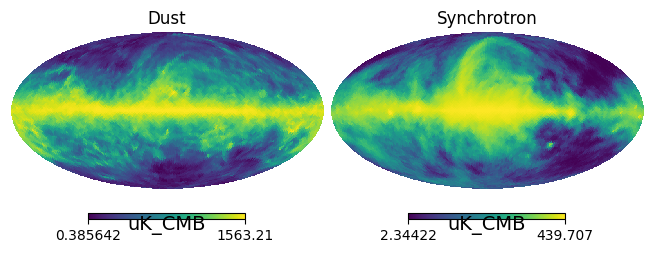

In [49]:

hp.mollview(result.s[0,0], title='Dust', norm='hist', unit=map_s_uKCMB.unit, sub=(1,2,1) )
hp.mollview(result.s[1,0], title='Synchrotron', norm='hist',unit=map_s_uKCMB.unit, sub=(1,2,2))



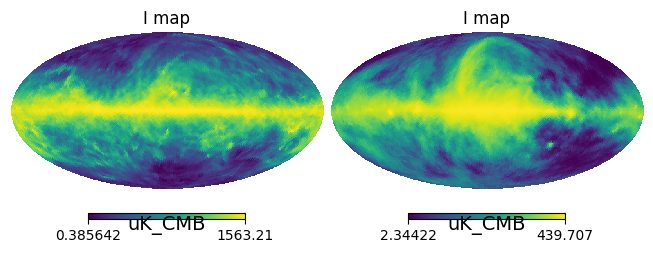

In [50]:

hp.mollview(map_d_uKCMB[0], title="I map",norm='hist',unit=map_s_uKCMB.unit, sub=(1,2,1))
hp.mollview(map_s_uKCMB[0], title="I map", norm='hist',unit=map_s_uKCMB.unit, sub=(1,2,2))

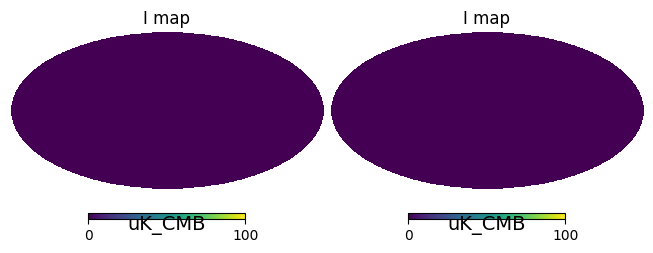

In [51]:

hp.mollview(map_d_uKCMB[0].value-result.s[0,0], min=0, max=1e2, title="I map", unit=map_d_uKCMB.unit, sub=(1,2,1))
hp.mollview(map_s_uKCMB[0].value-result.s[1,0], min=0, max=1e2, title="I map", unit=map_s_uKCMB.unit, sub=(1,2,2),)